# Preprocessing of the data

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import datetime
import sklearn

# Testing and validation data
# Import the data for the NJ train network. Month of March 2018. 
## Drop the observations with NaN delay.

In [17]:
df = pd.read_csv('2018_03.csv')
df.dropna(subset=['delay_minutes'], inplace=True)
df.reset_index(drop=True, inplace=True)

Encoding the days of the week (0 : Monday ..., 6 : Sunday) 

In [18]:
day = []
time = []
for (k,v) in enumerate(df['actual_time']):
    aux = datetime.datetime.strptime(v, '%Y-%m-%d %H:%M:%S')
    time_only = aux.time()
    day.append(aux.weekday())
    time_in_min = time_only.hour*60 + time_only.minute
    time.append(time_in_min)
    
df['day'] = day
df['time'] = time

Encoding the line names and the departure station with label encoding

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['line'] = le.fit_transform(df['line'])
df['from_id'] = le.fit_transform(df['from_id'])
df['train_id'] = le.fit_transform(df['train_id'])

In [20]:
df.drop(columns = ['date','from','to','to_id','scheduled_time','status','type','actual_time'], inplace = True)
#Binary Classification
df['label'] = df['delay_minutes'].apply(lambda x: 1 if x >0.9 else 0)
#3 Labels Classification
df['Logged Delay'] = np.ceil(np.log(df['delay_minutes']+1e-6))
df['Logged Delay']= df['Logged Delay'].apply(lambda x: -1 if x <0 else(2 if x >= 2 else 1))
df.drop(columns = ['delay_minutes'], inplace = True)

dataset = df.values.astype(int)
Y_train_binary = df['label'].values
df.drop(columns = 'label',inplace = True)
Y_train = df['Logged Delay'].values
df.drop(columns = 'Logged Delay',inplace = True)
X_train = df.values

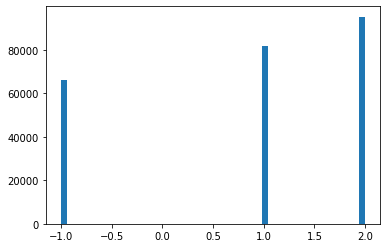

In [21]:
plot = plt.hist(Y_train,bins = 50)

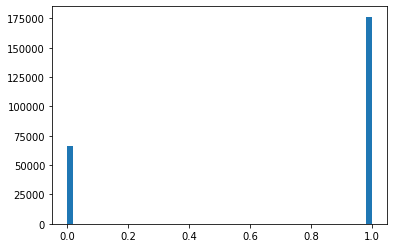

In [22]:
plot = plt.hist(Y_train_binary,bins = 50)

# Testing Data
# Import the data for the NJ train network. Month of June 2018. 
## Drop the observations with NaN delay.

In [26]:
df2 = pd.read_csv('2018_06.csv')
df2.dropna(subset=['delay_minutes'], inplace=True)
df2.reset_index(drop=True, inplace=True)
day = []
time = []

for (k,v) in enumerate(df2['actual_time']):
    aux = datetime.datetime.strptime(v, '%Y-%m-%d %H:%M:%S')
    time_only = aux.time()
    day.append(aux.weekday())
    time_in_min = time_only.hour*60 + time_only.minute
    time.append(time_in_min)
    
df2['day'] = day
df2['time'] = time

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df2['line'] = le.fit_transform(df2['line'])
df2['from_id'] = le.fit_transform(df2['from_id'])
df2['train_id'] = le.fit_transform(df2['train_id'])

df2.drop(columns = ['date','from','to','to_id','scheduled_time','status','type','actual_time'], inplace = True)

df2['label'] = df2['delay_minutes'].apply(lambda x: 1 if x >0.9 else 0)

df2['Logged Delay'] = np.ceil(np.log(df2['delay_minutes']+1e-6))

df2.drop(columns = ['delay_minutes'], inplace = True)
df2['Logged Delay']= df2['Logged Delay'].apply(lambda x: -1 if x <0 else(2 if x >= 2 else 1))

dataset = df2.values.astype(int)
Y_test_binary = df2['label'].values
df2.drop(columns = 'label',inplace = True)
Y_test = df2['Logged Delay'].values
df2.drop(columns = 'Logged Delay',inplace = True)
X_test = df2.values


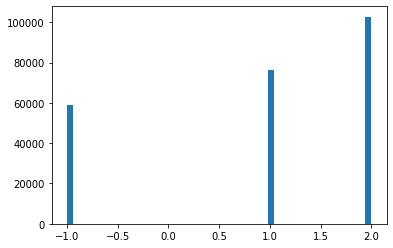

In [27]:
plot = plt.hist(Y_test,bins = 50)

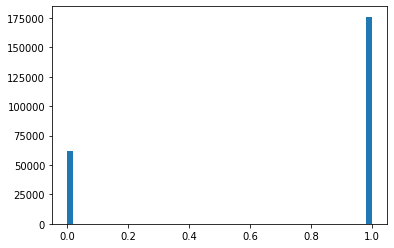

In [28]:
plot = plt.hist(Y_test_binary,bins = 50)

 # Split Data

In [29]:
def split_data(x, y, ratio, myseed=1):
    """split the dataset based on the split ratio.
        Returns x1 , x2 , y1 , y2
    """
    # set seed
    np.random.seed(myseed)
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    indices = range(len(y))
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    # create split
    x_tr = x[index_tr]
    x_te = x[index_te]
    y_tr = y[index_tr]
    y_te = y[index_te]
    return x_tr, x_te, y_tr, y_te

# Binary Classification

In [32]:
X = X_train.copy()
Y = Y_train_binary.copy()

In [38]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X = scalar.fit_transform(X)
ratio=0.8
train_size=int(dataset.shape[0]*ratio)
train_set=X[0:train_size]
test_Set=X[train_size:]
labels_train=Y[0:train_size]
labels_validation=Y[train_size:]

In [39]:
x_tr, x_te, y_tr, y_te=split_data(train_set,labels_train,ratio)

In [36]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense,Dropout,Reshape
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

model1 = Sequential()
model1.add(Dense(12, input_dim=x_tr.shape[1], activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [37]:
history_binary = model1.fit(x_tr, y_tr, epochs=10, batch_size=10, verbose=1,validation_data = (x_te,y_te))

Train on 152313 samples, validate on 38079 samples
Epoch 1/10
152313/152313 [==============================] - 16s 105us/step - loss: 0.5495 - accuracy: 0.7532 - val_loss: 0.5022 - val_accuracy: 0.7870
Epoch 2/10
152313/152313 [==============================] - 17s 112us/step - loss: 0.5062 - accuracy: 0.7804 - val_loss: 0.4922 - val_accuracy: 0.7880
Epoch 3/10
152313/152313 [==============================] - 16s 106us/step - loss: 0.5006 - accuracy: 0.7827 - val_loss: 0.4922 - val_accuracy: 0.7869
Epoch 4/10
152313/152313 [==============================] - 17s 113us/step - loss: 0.4966 - accuracy: 0.7840 - val_loss: 0.4841 - val_accuracy: 0.7926
Epoch 5/10
152313/152313 [==============================] - 16s 108us/step - loss: 0.4942 - accuracy: 0.7860 - val_loss: 0.4805 - val_accuracy: 0.7969
Epoch 6/10
152313/152313 [==============================] - 18s 117us/step - loss: 0.4922 - accuracy: 0.7867 - val_loss: 0.4900 - val_accuracy: 0.7880
Epoch 7/10
152313/152313 [=================

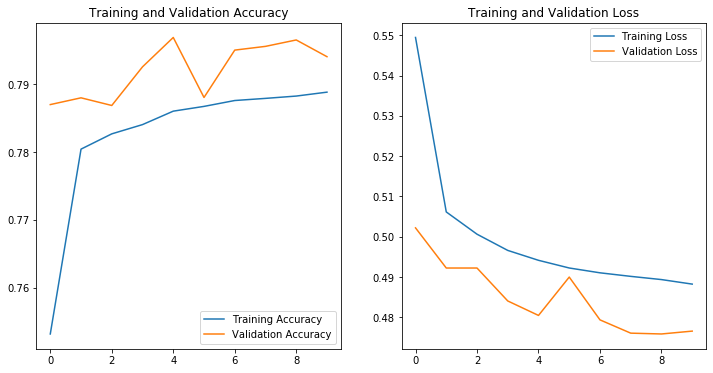

In [138]:
acc = history_binary.history['accuracy']
val_acc = history_binary.history['val_accuracy']

loss = history_binary.history['loss']
val_loss = history_binary.history['val_loss']

epochs_range = range(10)

fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

fig.savefig('Images and Gifs/Binary_classification.png')

## Evaluate Model on a new dataset

In [41]:
model1.evaluate(scalar.fit_transform(X_test), y = Y_test_binary, batch_size=30, verbose=1)

237991/237991 [==============================] - 3s 13us/step


[0.5142962385814215, 0.7863070368766785]

# 3 Labels Classification

In [42]:
Y = Y_train.copy()

In [43]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PowerTransformer,Normalizer

minY = min(Y)
maxY = max(Y)
Y = (Y-minY)/(maxY-minY)

In [45]:
ratio=0.8
train_size=int(dataset.shape[0]*ratio)
train_set=X[0:train_size]
test_Set=X[train_size:]
labels_train=Y[0:train_size]
labels_validation=Y[train_size:]

In [46]:
x_tr, x_te, y_tr, y_te=split_data(train_set,labels_train,ratio)

In [50]:
model2 = Sequential()
model2.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='relu'))
model2.compile(loss='mean_squared_error', optimizer='adam',
                metrics=['accuracy'])
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                224       
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [51]:
history_3classes = model2.fit(x_tr, y_tr, epochs=10, batch_size=10, verbose=1,validation_data = (x_te,y_te),shuffle = True)

Train on 152313 samples, validate on 38079 samples
Epoch 1/10
152313/152313 [==============================] - 17s 114us/step - loss: 0.1409 - accuracy: 0.4595 - val_loss: 0.1338 - val_accuracy: 0.4767
Epoch 2/10
152313/152313 [==============================] - 19s 122us/step - loss: 0.1346 - accuracy: 0.4711 - val_loss: 0.1312 - val_accuracy: 0.4800
Epoch 3/10
152313/152313 [==============================] - 19s 122us/step - loss: 0.1332 - accuracy: 0.4727 - val_loss: 0.1305 - val_accuracy: 0.4814
Epoch 4/10
152313/152313 [==============================] - 19s 123us/step - loss: 0.1321 - accuracy: 0.4739 - val_loss: 0.1299 - val_accuracy: 0.4800
Epoch 5/10
152313/152313 [==============================] - 19s 126us/step - loss: 0.1310 - accuracy: 0.4742 - val_loss: 0.1288 - val_accuracy: 0.4853
Epoch 6/10
152313/152313 [==============================] - 17s 115us/step - loss: 0.1300 - accuracy: 0.4753 - val_loss: 0.1274 - val_accuracy: 0.4878
Epoch 7/10
152313/152313 [=================

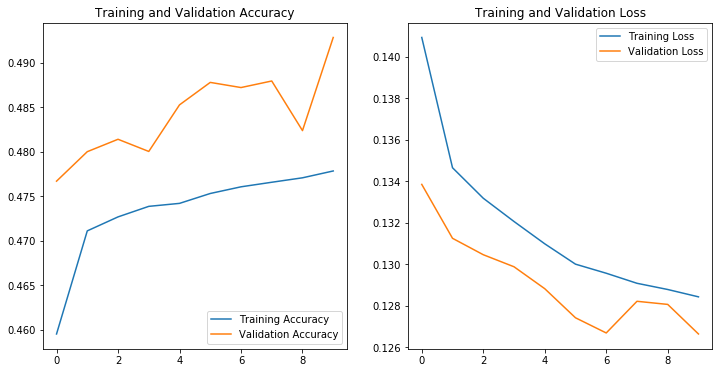

In [139]:
acc = history_3classes.history['accuracy']
val_acc = history_3classes.history['val_accuracy']

loss = history_3classes.history['loss']
val_loss = history_3classes.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
fig.savefig('Images and Gifs/3labels_classification.png')

In [53]:
model2.evaluate(scalar.fit_transform(X_test), y = (Y_test-minY)/(maxY-minY), batch_size=10, verbose=1)

237991/237991 [==============================] - 10s 41us/step


[0.1373635417033186, 0.486594021320343]

# Regression

In [56]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    poly = np.ones((len(x), 1))
    for deg in range(1, degree + 1):
        poly = np.c_[poly, np.power(x, deg)]
    return poly

# Feature augmentation

In [105]:
X_train_reg = X_train.copy()
scalar = MinMaxScaler()
X_train_reg = scalar.fit_transform(X_train_reg)

In [106]:
sinx = np.sin(X_train_reg)
cosx = np.cos(X_train_reg)
ex = np.exp(X_train_reg)
#logx = np.log(X_train_reg+1)
X_train_reg = np.append(X_train_reg,sinx,axis=1)
X_train_reg = np.append(X_train_reg,cosx,axis=1)
X_train_reg = np.append(X_train_reg,ex,axis=1)
#X_train_reg = np.append(X_train_reg,logx,axis=1)
X_train_reg = build_poly(X_train_reg, 12)

In [107]:
X_test_reg = X_test.copy()
scalar = MinMaxScaler()
X_test_reg = scalar.fit_transform(X_test_reg)

In [108]:
sinx = np.sin(X_test_reg)
cosx = np.cos(X_test_reg)
ex = np.exp(X_test_reg)
#logx = np.log(X_test_reg+1)
X_test_reg = np.append(X_test_reg,sinx,axis=1)
X_test_reg = np.append(X_test_reg,cosx,axis=1)
X_test_reg = np.append(X_test_reg,ex,axis=1)
#X_test_reg = np.append(X_test_reg,logx,axis=1)
X_test_reg = build_poly(X_test_reg, 12)

In [130]:
from sklearn.linear_model import Ridge,SGDRegressor,LinearRegression
clf = Ridge(alpha = 1e-8, max_iter=1e8, normalize = True, solver = 'svd',tol = 1e-6)
clf.fit(X_train_reg, Y_train)

Ridge(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=100000000.0,
      normalize=True, random_state=None, solver='svd', tol=1e-06)

In [131]:
y_pred = clf.predict(X_test_reg)

In [132]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
mean_squared_error(Y_test, y_pred)

1.2130760149170003

In [133]:
r2_score(Y_test, y_pred)

0.14590602187878166